In [51]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

nodes = pd.read_csv("subreddit_nodes.csv", index_col=0)
edges = pd.read_csv("subreddit_edges.csv", delimiter=';')
#print(nodes)
#print(edges)

G = nx.Graph()
for index, row in nodes.iterrows():
  G.add_node(index, name=row['Label'], category=row['Category'])

for index, row in edges.iterrows():
  G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

print(len(G.nodes))


674


In [52]:
N = len(G)
L = G.size()
degrees = [G.degree(node) for node in G]
print(len(degrees))
print(len([deg for deg in degrees if deg == 0]))
kmin = min(degrees)
kmax = max(degrees)
print("min: {}; max: {}".format(kmin, kmax))

674
0
min: 1; max: 673


[1.00000000e+00 1.59028322e+00 2.52900073e+00 4.02182742e+00
 6.39584468e+00 1.01712045e+01 1.61750958e+01 2.57229835e+01
 4.09068291e+01 6.50534440e+01 1.03453401e+02 1.64520207e+02
 2.61633725e+02 4.16071723e+02 6.61671881e+02 1.05224569e+03
 1.67336867e+03 2.66113012e+03 4.23195058e+03 6.73000000e+03]
[7.54051345e-03 1.58053889e-02 3.27977952e-02 2.74984940e-02
 1.21826972e-02 2.22407684e-02 1.55393483e-02 1.41685800e-02
 6.57457411e-03 3.09100251e-03 6.80288180e-04 1.52777858e-05
 9.60695905e-06 0.00000000e+00 3.79871739e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


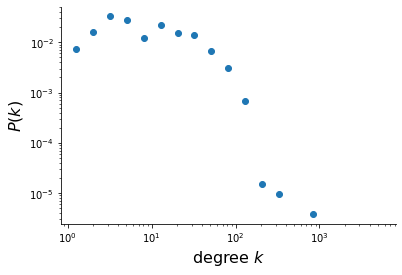

In [53]:
# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=20)
print(bin_edges)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)
print(density)

fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

In [54]:
bin_edges

array([1.00000000e+00, 1.59028322e+00, 2.52900073e+00, 4.02182742e+00,
       6.39584468e+00, 1.01712045e+01, 1.61750958e+01, 2.57229835e+01,
       4.09068291e+01, 6.50534440e+01, 1.03453401e+02, 1.64520207e+02,
       2.61633725e+02, 4.16071723e+02, 6.61671881e+02, 1.05224569e+03,
       1.67336867e+03, 2.66113012e+03, 4.23195058e+03, 6.73000000e+03])

In [55]:
density

array([7.54051345e-03, 1.58053889e-02, 3.27977952e-02, 2.74984940e-02,
       1.21826972e-02, 2.22407684e-02, 1.55393483e-02, 1.41685800e-02,
       6.57457411e-03, 3.09100251e-03, 6.80288180e-04, 1.52777858e-05,
       9.60695905e-06, 0.00000000e+00, 3.79871739e-06, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])